# Neural Networks for Age Prediction in Abalones in Biology

Models used:

<ol start="1">
<li>Model 1: only with three dense layers</li>
<li>Model 2: only with dense layers of depth twice model1</li>
<li>Model 3: 
  <ul style="list-style-type: decimal;">
    <li>with dense layers of depth twice model1</li>
    <li>with a dropout and a normalisation layer after each dense layer</li>
  </ul>
<li>Model 4: </li>
</li>
  <ul style="list-style-type: decimal;">
    <li>with more layers that Model 3</li>
    <li>with several dense layers with decreasing depth</li>
    <li>with dropout and normalisation layers</li>
</ol>

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from utils import nn_model1, nn_model2, nn_model3, nn_model4, helper

## 1. EDA (Reading, Cleaning and Inspecting Data)

In [4]:
df = pd.read_csv('abalone.csv')

In [6]:
df = df.dropna()

In [8]:
display(df)

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [10]:
df.describe()

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [12]:
# we drop the first column w non-numerical values
df = df.drop(columns='Type')
df

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# 2. Splitting Data

In [15]:
X = df.drop(columns='Rings')
y = df['Rings']
print(X)
print(y)

      LongestShell  Diameter  Height  WholeWeight  ShuckedWeight  \
0            0.455     0.365   0.095       0.5140         0.2245   
1            0.350     0.265   0.090       0.2255         0.0995   
2            0.530     0.420   0.135       0.6770         0.2565   
3            0.440     0.365   0.125       0.5160         0.2155   
4            0.330     0.255   0.080       0.2050         0.0895   
...            ...       ...     ...          ...            ...   
4172         0.565     0.450   0.165       0.8870         0.3700   
4173         0.590     0.440   0.135       0.9660         0.4390   
4174         0.600     0.475   0.205       1.1760         0.5255   
4175         0.625     0.485   0.150       1.0945         0.5310   
4176         0.710     0.555   0.195       1.9485         0.9455   

      VisceraWeight  ShellWeight  
0            0.1010       0.1500  
1            0.0485       0.0700  
2            0.1415       0.2100  
3            0.1140       0.1550  
4       

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

# 3. Training with Neural Network Models

## 3.1. Model 1: only with three dense layers

In [21]:
model1 = nn_model1.NeuralNetworkModel1(input_shape=7)
model1.compile_model1()
model1.summary1()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,857 (101.00 KB)

 Trainable params: 25,857 (101.00 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Fitting with Earlystopping to avoid over/underfitting:

early_stopping = callbacks.EarlyStopping(
    monitor = "val_msle",
    mode = "auto",
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)


history1 = model1.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    batch_size=256,
    epochs = 256,
    callbacks=[early_stopping],
    verbose=1 
)

Epoch 1/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.6528 - msle: 4.6528 - val_loss: 2.6527 - val_msle: 2.6527
Epoch 2/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.1027 - msle: 2.1027 - val_loss: 0.8148 - val_msle: 0.8148
Epoch 3/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5591 - msle: 0.5591 - val_loss: 0.1310 - val_msle: 0.1310
Epoch 4/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0882 - msle: 0.0882 - val_loss: 0.0670 - val_msle: 0.0670
Epoch 5/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0668 - msle: 0.0668 - val_loss: 0.0705 - val_msle: 0.0705
Epoch 6/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0638 - msle: 0.0638 - val_loss: 0.0615 - val_msle: 0.0615
Epoch 7/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0573 - msle: 0.0573 - val_loss: 0.0605 - val_msle: 0.0605
Epoch 8/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0522 - msle: 0.0522 - val_loss: 0.0587 - val_msle: 0.0587
Epoch 9/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

min validation msle: 0.033110361546278


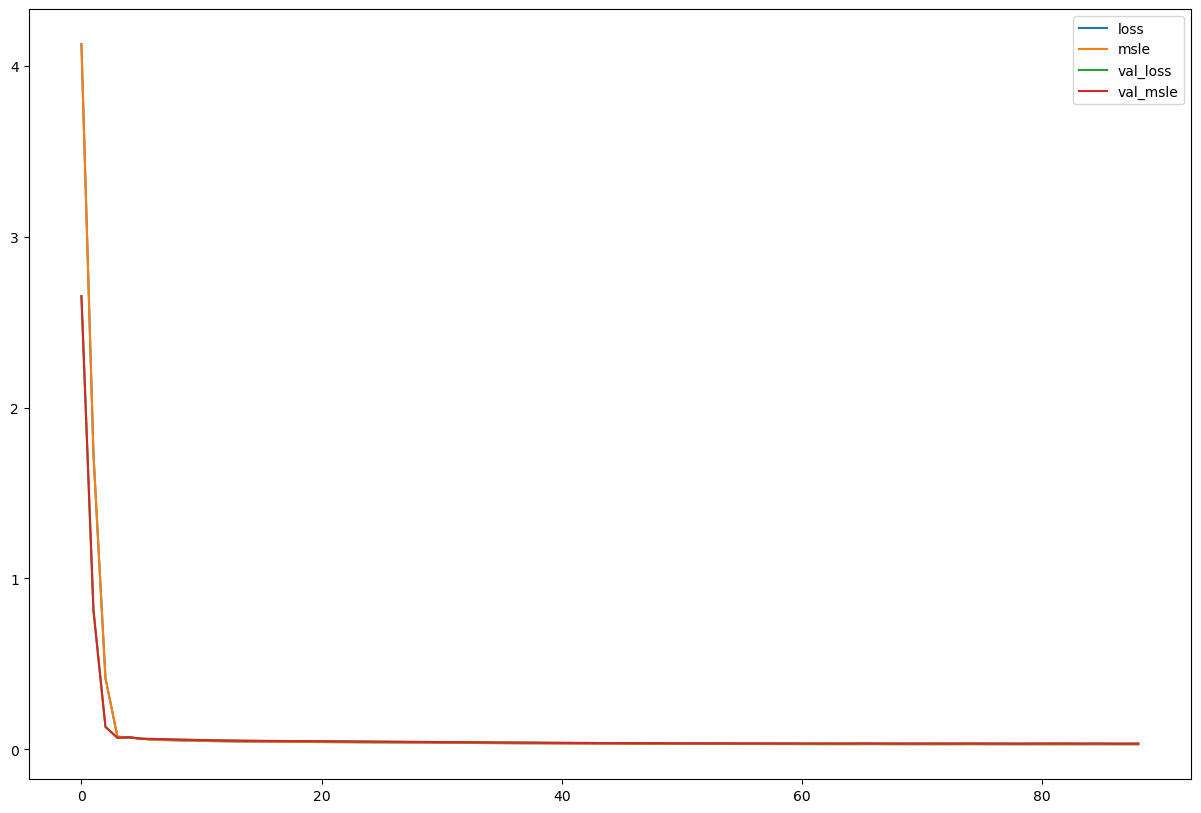

In [25]:
history_df1 = pd.DataFrame(history1.history)
history_df1.plot(figsize=(15,10))
print("min validation msle: {}".format(history_df1['val_msle'].min()))

## 3.2. Model 2: only with dense layers of depth twice model1

In [27]:
model2 = nn_model2.NeuralNetworkModel2(input_shape=7)
model2.compile_model2()
model2.summary2()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 529,921 (2.02 MB)

 Trainable params: 529,921 (2.02 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Fitting with Earlystopping to avoid over/underfitting:

early_stopping = callbacks.EarlyStopping(
    monitor = "val_msle",
    mode = "auto",
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)


history2 = model2.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    batch_size=256,
    epochs = 256,
    callbacks=[early_stopping],
    verbose=1 
)

Epoch 1/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2745 - msle: 3.2745 - val_loss: 0.0839 - val_msle: 0.0839
Epoch 2/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1936 - msle: 0.1936 - val_loss: 0.2067 - val_msle: 0.2067
Epoch 3/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1432 - msle: 0.1432 - val_loss: 0.0947 - val_msle: 0.0947
Epoch 4/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0869 - msle: 0.0869 - val_loss: 0.0630 - val_msle: 0.0630
Epoch 5/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0571 - msle: 0.0571 - val_loss: 0.0562 - val_msle: 0.0562
Epoch 6/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0500 - msle: 0.0500 - val_loss: 0.0500 - val_msle: 0.0500
Epoch 7/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0440 - msle: 0.0440 - val_loss: 0.0464 - val_msle: 0.0464
Epoch 8/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0425 - msle: 0.0425 - val_loss: 0.0452 - val_msle: 0.0452
Epoch 9/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/st

min validation msle: 0.03351708501577377


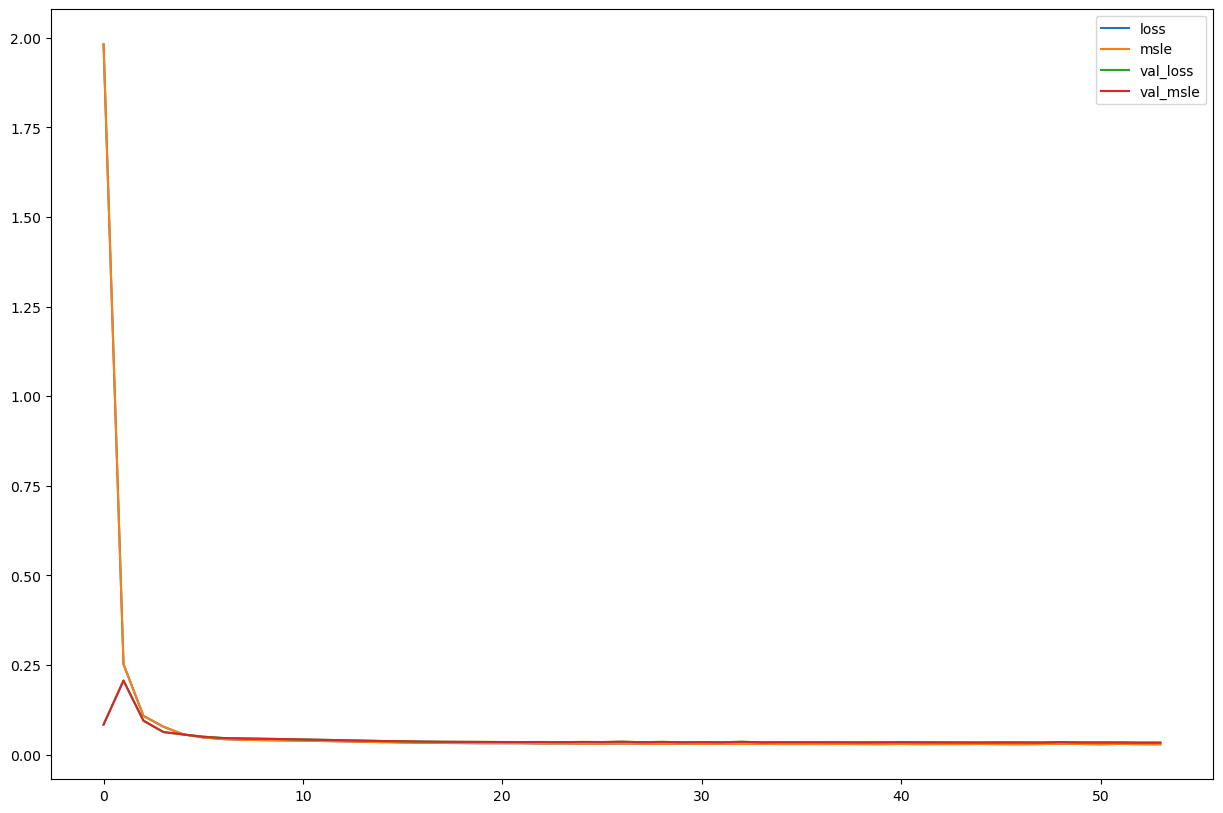

In [31]:
history_df2 = pd.DataFrame(history2.history)
history_df2.plot(figsize=(15,10))
print("min validation msle: {}".format(history_df2['val_msle'].min()))

## 3.2. Model 3: with dense layers of depth twice model1, and Dropout and Normalisation after each dense layer

In [34]:
model3 = nn_model3.NeuralNetworkModel3(input_shape=7)
model3.compile_model3()
model3.summary3()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 1024)           │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,170,305 (12.09 MB)

 Trainable params: 3,164,161 (12.07 MB)

 Non-trainable params: 6,144 (24.00 KB)

In [36]:
# Fitting with Earlystopping to avoid over/underfitting:

early_stopping = callbacks.EarlyStopping(
    monitor = "val_msle",
    mode = "auto",
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)


history3 = model3.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    batch_size=256,
    epochs = 256,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 3.0409 - msle: 3.0409 - val_loss: 2.1034 - val_msle: 2.1034
Epoch 2/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.1494 - msle: 1.1494 - val_loss: 0.7223 - val_msle: 0.7223
Epoch 3/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.7657 - msle: 0.7657 - val_loss: 0.3907 - val_msle: 0.3907
Epoch 4/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.5881 - msle: 0.5881 - val_loss: 0.1809 - val_msle: 0.1809
Epoch 5/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.5548 - msle: 0.5548 - val_loss: 0.1555 - val_msle: 0.1555
Epoch 6/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.4116 - msle: 0.4116 - val_loss: 0.0879 - val_msle: 0.0879
Epoch 7/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.4009 - msle: 0.4009 - val_loss: 0.0835 - val_msle: 0.0835
Epoch 8/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3304 - msle: 0.3304 - val_loss: 0.0785 - val_msle: 0.0785
Epoch 9/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0

min validation msle: 0.05983684957027435


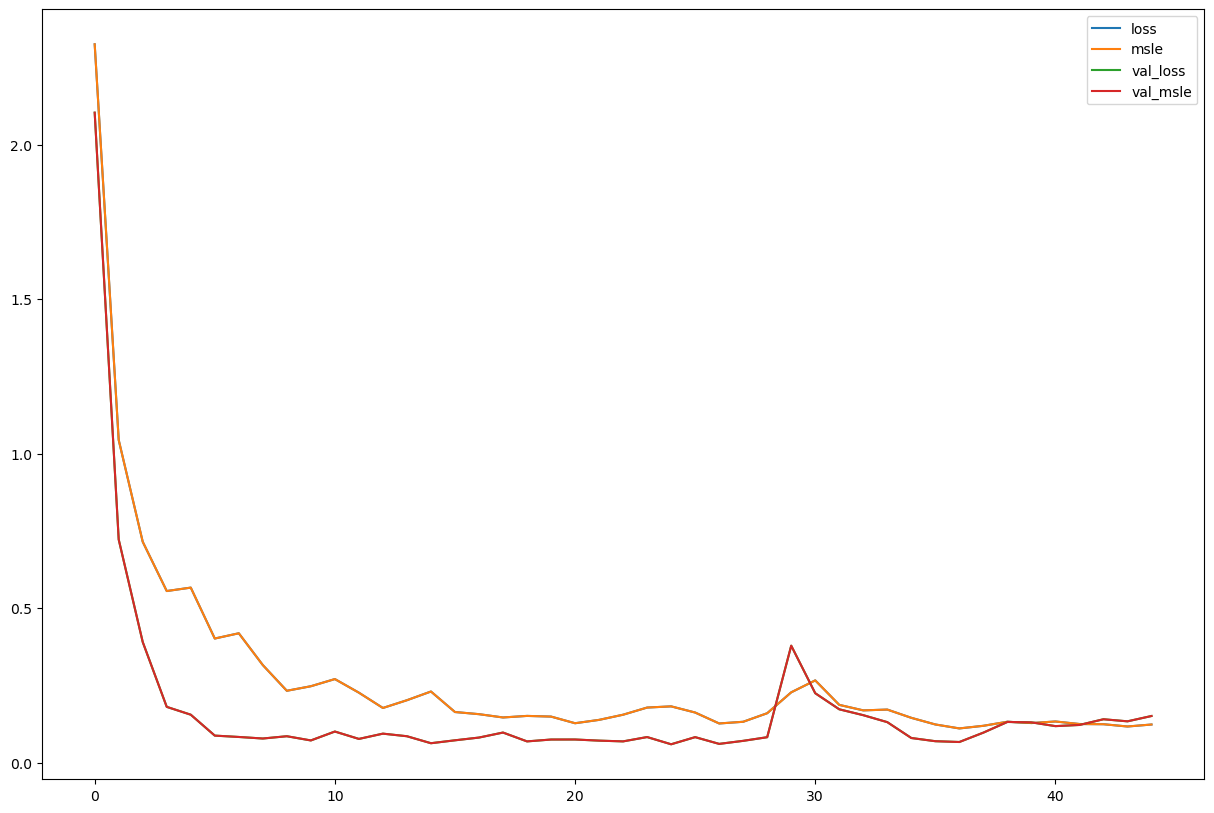

In [38]:
history_df3 = pd.DataFrame(history3.history)
history_df3.plot(figsize=(15,10))
print("min validation msle: {}".format(history_df3['val_msle'].min()))

## 3.4. Model 4: with several dense layers as well as dropout and normalisations, more than Model 3

In [27]:
model4 = nn_model4.NeuralNetworkModel4()
model4.compile_model4()
model4.summary4()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 1024)           │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 3)              │            27 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 383,351 (1.46 MB)

 Trainable params: 381,831 (1.46 MB)

 Non-trainable params: 1,520 (5.94 KB)

In [29]:
# Fitting with Earlystopping to avoid over/underfitting:

early_stopping = callbacks.EarlyStopping(
    monitor = "val_msle",
    mode = "auto",
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)


history4 = model4.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    batch_size=256,
    epochs = 256,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 4.6620 - msle: 4.6620 - val_loss: 5.6153 - val_msle: 5.6153
Epoch 2/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.6531 - msle: 3.6531 - val_loss: 5.6105 - val_msle: 5.6105
Epoch 3/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1785 - msle: 3.1785 - val_loss: 5.5414 - val_msle: 5.5414
Epoch 4/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.9166 - msle: 2.9166 - val_loss: 5.3579 - val_msle: 5.3579
Epoch 5/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6954 - msle: 2.6954 - val_loss: 5.0398 - val_msle: 5.0398
Epoch 6/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5355 - msle: 2.5355 - val_loss: 4.5536 - val_msle: 4.5536
Epoch 7/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4072 - msle: 2.4072 - val_loss: 3.8372 - val_msle: 3.8372
Epoch 8/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2047 - msle: 2.2047 - val_loss: 2.9249 - val_msle: 2.9249
Epoch 9/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/s

min validation msle: 0.08521779626607895


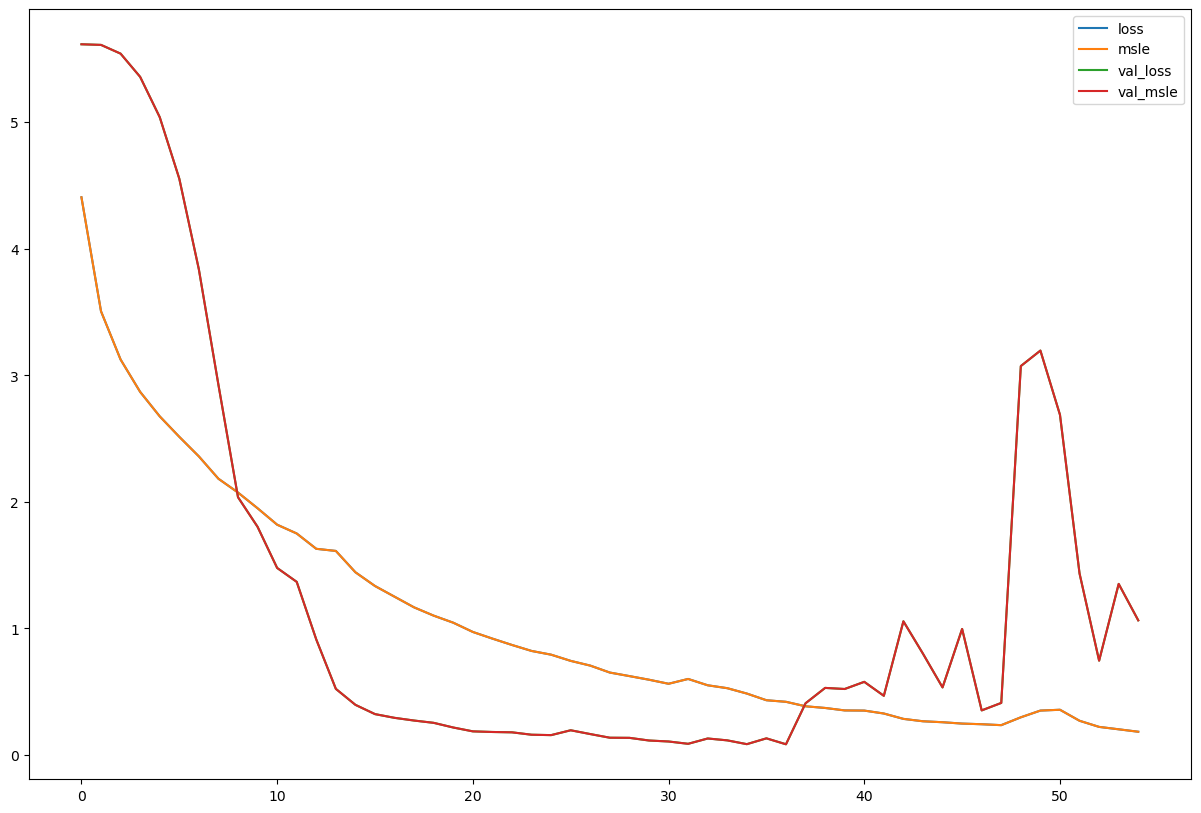

In [33]:
history_df4 = pd.DataFrame(history4.history)
history_df4.plot(figsize=(15,10))
print("min validation msle: {}".format(history_df4['val_msle'].min()))